<h1>TSE - Tribunal Superior Eleitoral</h1>
Eleições de 2022

---
<h2>
# *Análise Exploratória de Dados com Python
</h2>

```
Munícipio: Belo Horizonte, MG
Zona eleitoral: 0031
Seção: 0001

```
Autor: [Bruno Alves]<br>(https://www.linkedin.com/in/casima/)<br>
01/12/2022

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Exploração;</li>
  <li>Processamento;</li>
  <li>Visualização;</li>
  <li>Divulgação.</li>
</ol>

---

# **Etapas**

## 1\. Introdução

*Vamos* entender o contexto de negócio que estamos inseridos utilizando o ***Google Colab***.

### **1.1. Contexto** 

O tribunal superior eleitoral (TSE) disponibilizou os dados brutos das urnas de votação utilizadas durante o processo eleitoral de 2022. No site do TSE ([link](https://resultados.tse.jus.br/oficial/app/index.html#/eleicao/resultados)) encontra-se os seguintes dados para cada urna:

 - **Registro Digital do Voto (RDV)**: Registro unitário dos votos;
 - **Boletim de Urna**: Resultados agregados;
 - **Log de Urna**: Todos os eventos que ocorreram na urna.

A documentação técnica para o processamento dos arquivo também se encontra no website do TSE ([link](https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica)).

> Para uma única urna (estado, cidade, zona e seção), vamos utilizar o **Python** para processar o seu arquivo **RDV** e replicar os valores agregados do seu **Boletim de Urna** para o segundo turno de votação para presidente do processo eleitoral de 2022.

### **1.2. Google Colab**

> Ferramenta web autogerênciada de cadernos (*notebooks*).

**Ferramenta web**



*   Conta Google em [gmail.com](https://gmail.com);
*   Acesse o Google Colab através do endereço [colab.research.google.com](https://colab.research.google.com/).




**Autogerênciada** 



*   A Google provisiona uma máquina virtual para você;
*   A máquina virtual dura no máximo 12h.



**Cadernos (*notebooks*)** 

Um **caderno** é um documento *web* composto por um conjunto de elementos (células) de texto e código:


*   Células de **texto** podem ser editados com o editor da ferramenta, HTML ou Markdown; 
*   Células de **código** são exclusivamente para a linguagem de programação Python.



In [ ]:
print("olá, mundo!")

## 2\. Exploração

**Vamos explorar**, limpar e extrair os votos do arquivo RDV.

### **2.1. Upload** 

No site de resultados do TSE ([link](https://resultados.tse.jus.br/oficial/app/index.html)), selecione os dados de uma única urna, faça o *download* do arquivo RDV e então, o seu *upload* no ambiente do Google Colab. 

### **2.2. Descriptografia** 

In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Código disponibilizado pelo próprio TSE para descriptografar. ([link](https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica)). Para descriptografar o arquivo RDV em um arquivo de texto. O código foi replicado neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/notebooks/2022_11_29/rdv.py) para facilitar a sua integração com o Google Colab.

 - Faça o *download* do código de descriptografia.

In [140]:
!curl -s https://raw.githubusercontent.com/casima/eleicao-2022-presidente/main/descriptografia/rdv.py -o rdv.py

 - Instale o pacote de criptografia utilizado pelo código.

In [11]:
!pip install asn1crypto==1.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 KB 3.0 MB/s eta 0:00:00


 - Substitua o texto `<NOME-DO-ARQUIVO-RDV>` pelo nome do arquivo RDV escolhido.

In [138]:
!python rdv.py -r o00407-4123800310001.rdv > rdv.txt

2023-03-07 23:09:06,663 - INFO - Converte RDV o00407-4123800310001.rdv


### **2.3. Limpeza** 

Na etapa de limpeza, vamos selecionar apenas as linhas do arquivo RDV referentes a votação para presidente.

In [13]:
content = []

with open(file="rdv.txt", mode="r") as fp:
  for line in fp.readlines():
    if "Governador" in line:
      break
    else:
      content.append(line)

In [14]:
len(content)

288

In [15]:
for line in content[0:10]:
  print(line)


----------------------------------------

Presidente

  1 - nominal  - [13]

  2 - nominal  - [13]

  3 - nominal  - [13]

  4 - nominal  - [13]

  5 - nominal  - [13]

  6 - nominal  - [13]

  7 - nominal  - [13]



### **2.4. Extração** 

Na etapa de extração, vamos extrair apenas os dados de votação.

In [86]:
import re

In [18]:
pattern = re.compile(pattern="\[(.*?)\]")

In [55]:
votes = []

for line in content:

  if "branco" in line:

    votes.append({"voto": "branco", "quantidade": 1})

  if "nulo" in line:

    votes.append({"voto": "nulo", "quantidade": 1})

  if "nominal" in line:

    vote = re.findall(pattern=pattern, string=line)[0]
    votes.append({"voto": f"{vote}", "quantidade": 1})

In [20]:
len(votes)

284

In [21]:
for vote in votes[0:10]:
  print(vote)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


## 3\. Processamento

Etapa agregar os votos extraídos do arquivo RDV.

In [57]:
for vote in votes[0:10]:
  print(vote)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


### **3.1. Pandas**

Vamos utilizar o `Pandas`, o pacote **Python** mais utilizado para processamento de dados.

In [87]:
import pandas as pd

### **3.2. DataFrame**

A abstração base do `Pandas` é o `DataFrame`, uma estrutura de dados que representa uma tabela de duas dimensões.

In [59]:
votes_table = pd.DataFrame(votes)

In [60]:
votes_table.head(n=15)

,voto,quantidade
0,13,1
1,13,1
2,13,1
3,13,1
4,13,1
5,13,1
6,13,1
7,13,1
8,13,1
9,13,1


In [61]:
votes_table.tail(n=15)

,voto,quantidade
269,22,1
270,22,1
271,22,1
272,branco,1
273,branco,1
274,branco,1
275,branco,1
276,branco,1
277,branco,1
278,nulo,1


In [62]:
votes_table.shape

(284, 2)

In [63]:
votes_table.to_csv("rdv.csv", header=True, index=False)

### **3.3. Agregação**

Nesta etapa vamos agregagar os votos com uma operação matemática de soma.

In [64]:
votes_table_agg = votes_table.groupby('voto').agg('sum').reset_index()

In [65]:
votes_table_agg

,voto,quantidade
0,13,112
1,22,160
2,branco,6
3,nulo,6


Nesta etapa vamos ordenar os dados agregados de forma decrescente, ou seja, da maior quantidade de votos para a menor.

In [66]:
votes_table_agg = votes_table_agg.sort_values(by='quantidade', ascending=False)

In [67]:
votes_table_agg

,voto,quantidade
1,22,160
0,13,112
2,branco,6
3,nulo,6


Nesta etapa vamos adicionar uma coluna com os valores relativos percentuais da agregação dos dados.

In [68]:
votes_table_agg['%'] = round(100 * (votes_table_agg['quantidade'] / votes_table_agg['quantidade'].sum()), 2)

In [69]:
votes_table_agg

,voto,quantidade,%
1,22,160,56.34
0,13,112,39.44
2,branco,6,2.11
3,nulo,6,2.11


## 4\. Visualização

Nesta etapa vamos visualizar os dados agregados.

In [56]:
votes_table_agg

,voto,quantidade,%
1,22,160,56.34
0,13,112,39.44
2,branco,6,2.11
3,nulo,6,2.11


### **4.1. Seaborn**

Vamos utilizar o `Seaborn`, um dos pacotes **Python** mais utilizado para visualização de dados.

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
URNA = "Zona 0031 - Seção 0001"

Nesta primeira visualização, vamos observar a **quantidade de votos absolutos**.

In [41]:
x_column = 'voto'
y_column = 'quantidade'

In [50]:
title = f'Apuração Belo Horizonte/MG - Segundo turno de 2022 - {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade'

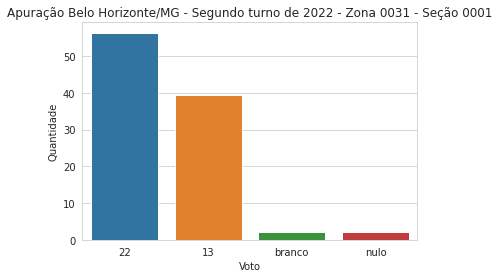

In [51]:
with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);

Nesta segunda visualização, vamos observar a **quantidade de votos relativos**.

In [106]:
title = f'Apuração Belo Horizonte/MG - Segundo turno de 2022 - {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade (%)'

In [45]:
x_column = 'voto'
y_column = '%'

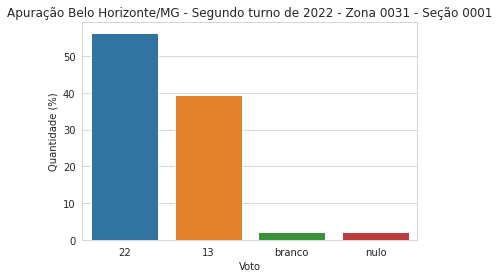

In [46]:
with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);

<AxesSubplot:title={'center':'Apuração Belo Horizonte/MG - Segundo turno de 2022 - Zona 0031 - Seção 0001'}, ylabel='quantidade'>

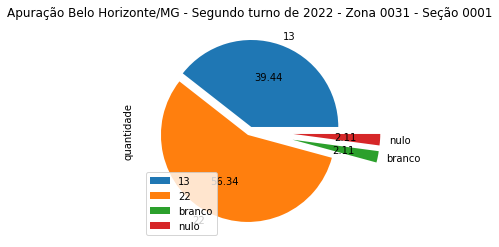

In [135]:
#Usando matplotlib
titulo = URNA
df = pd.DataFrame(votes_table_agg)
df.groupby(['voto']).sum().plot(kind='pie', y='quantidade', autopct='%.2f',
                                explode=(0.05, 0.05, 0.5, 0.5),
                                title=title)

Usando ***matplotlib***

## 5\. Divulgação

Expondo a análise de dados da **Eleição 2022**.

### **5.1. Kaggle**

[Kaggle](https://www.kaggle.com/) é a maior comunidade online de ciência de dados e aprendizado de máquina. A plataforma permite que usuários encontrem e publiquem **conjuntos de dados**, construam e compartilhem **notebooks** (como este do Google Colab) e participem de **competições** (que pagam muito dinheiro as vezes). 

> Publicando **notebook** na plataforma web do Kaggle.

 - Crie uma conta no Kaggle;
 - Faça o *download* do *notebook* do Google Colab;
 - Faça o *upload* do *notebook* no Kaggle.